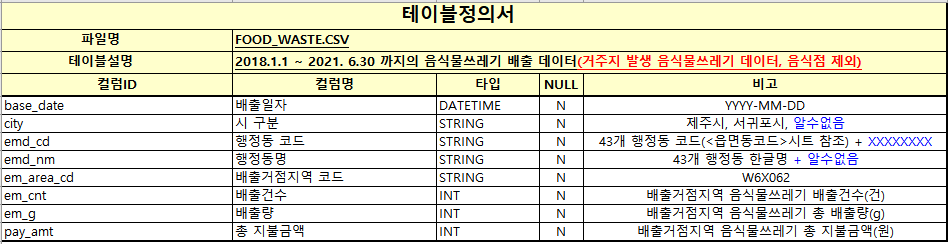

* 알수없음을 어떻게 처리할지
* 배출건수 - 배출량 상관관계: 상
* 배출량 - 지불금액 상관관계: 중 
* 배출건수 - 지불금액 상관관계: 하

### 제주도 음식물 쓰레기
배출 정보: https://www.jejusi.go.kr/recycle/intro/division/proggarbage.do
* 배출요일: 일~금 / 일몰 후부터 저녁 12시까지
* 투입금지: 비닐/금속/유리/병뚜겅/나무젓가락/이쑤시개/통뼈/기름/소금/소라껍질/전복껍질 등

일 평균 발생량: https://www.hani.co.kr/arti/area/jeju/998438.html
* 코로나19 이전: 최대 240t
* 6/8 기준: 하루 210~230t 
* 알수없음 처리할 때 고려

### 음쓰 주요 증가 원인
https://ene.gys.or.kr/%ed%8f%90%ea%b8%b0%eb%ac%bc%ec%a0%95%ec%b1%85/%ed%8f%90%ea%b8%b0%eb%ac%bc%ec%a0%9c%eb%8f%84/%ed%8f%90%ea%b8%b0%eb%ac%bc%ea%b4%80%eb%a6%ac/%eb%b6%84%eb%a6%ac%ec%88%98%ea%b1%b0+%eb%b0%8f+%ec%9e%ac%ed%99%9c%ec%9a%a9%ed%99%9c%ec%84%b1%ed%99%94/%ec%9d%8c%ec%8b%9d%eb%ac%bc%eb%a5%98+%ed%8f%90%ea%b8%b0%eb%ac%bc%ec%9d%98+%eb%b0%9c%ec%83%9d%ec%9b%90%ec%9d%b8"

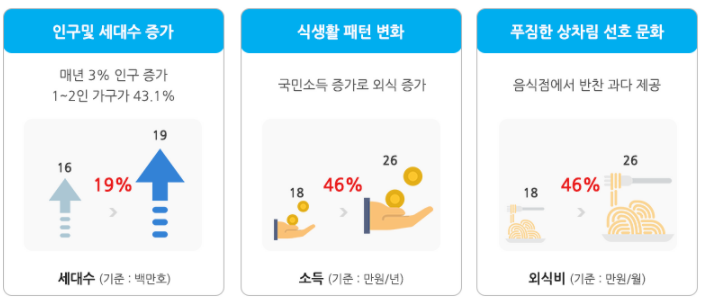

### 시간에 따른 배출량
* 생각보다 주기성은 안 보임 + 코로나 영향도 모르겠음
* 2020년 7월쯤 확 뛴 이유는? 여름철 성수기 그런건가
* 2019 -> 2020으로 가면서도 급 증가함

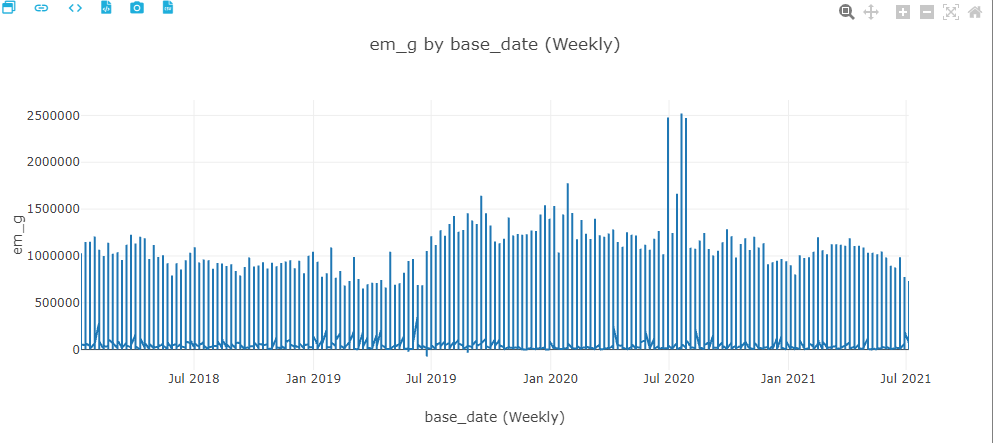

### 시간에 따른 배출건수
* 고만고만하다가 극단적으로 값이 뛰는데 관광지라 그런걸까?
* 근데 음식점 제외인데도 성수기 유무에 따라서 이렇게 차이가 나나?
* 그리고 상관관계가 높게 나온거에 비해 그래프 모양이 닮지는 않은 듯

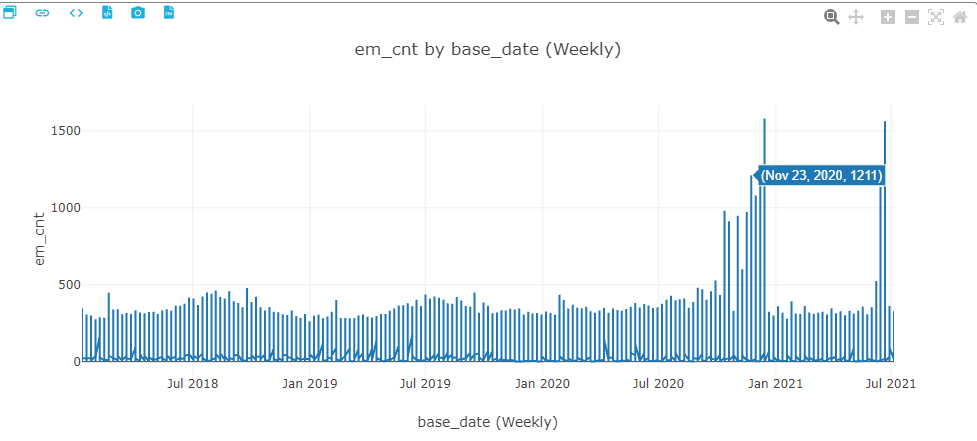

In [7]:
import pandas  as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
df1 = pd.read_csv('01_음식물쓰레기_FOOD_WASTE.CSV.csv', encoding='cp949')
df1['base_date'] = pd.to_datetime(df1['base_date'], format="%Y-%m-%d")

C:\Users\user\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [18]:
df1.head()

,base_date,city,emd_cd,emd_nm,em_area_cd,em_cnt,em_g,pay_amt
0,2018-01-01,제주시,50110670,외도동,W6X062,2,15500,464
1,2018-01-01,제주시,50110540,이도2동,W6X063,26,64650,1933
2,2018-01-01,제주시,50110630,아라동,W6X064,15,33500,1001
3,2018-01-01,제주시,50110610,삼양동,W6X065,4,8400,252
4,2018-01-01,제주시,50110540,이도2동,W6X066,21,51450,1538


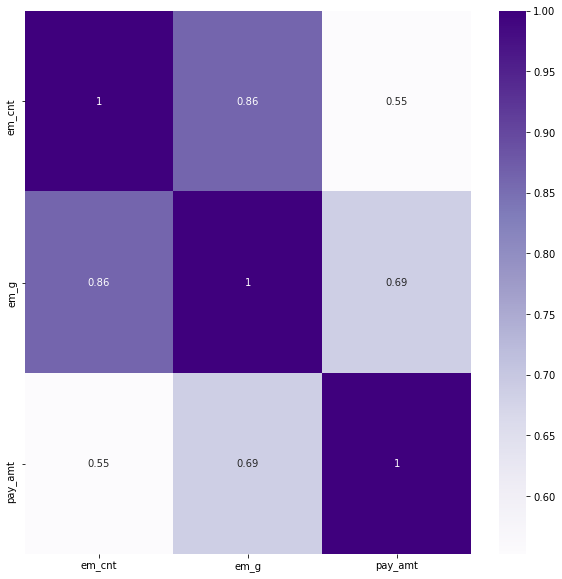

In [9]:
plt.figure(figsize=(10,10))
cor=df1.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.Purples)
plt.show()

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='em_g', ylabel='Density'>

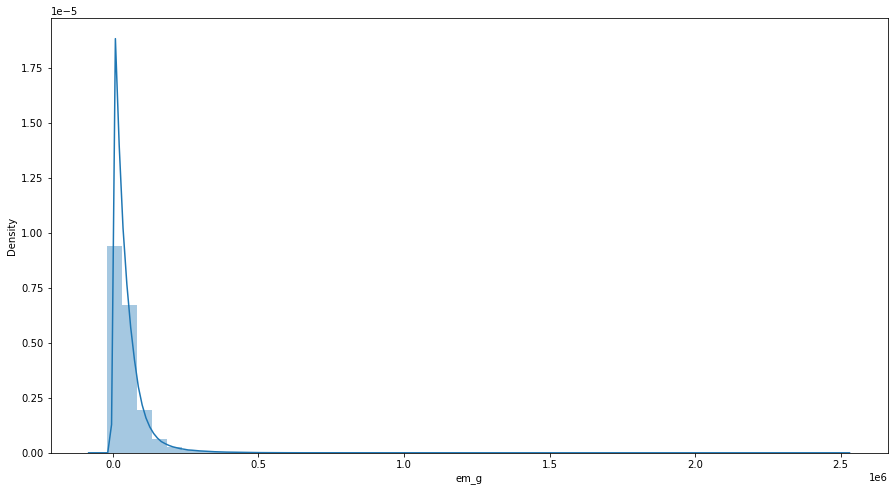

In [11]:
plt.figure(figsize=(15,8))
sns.distplot(df1['em_g'])

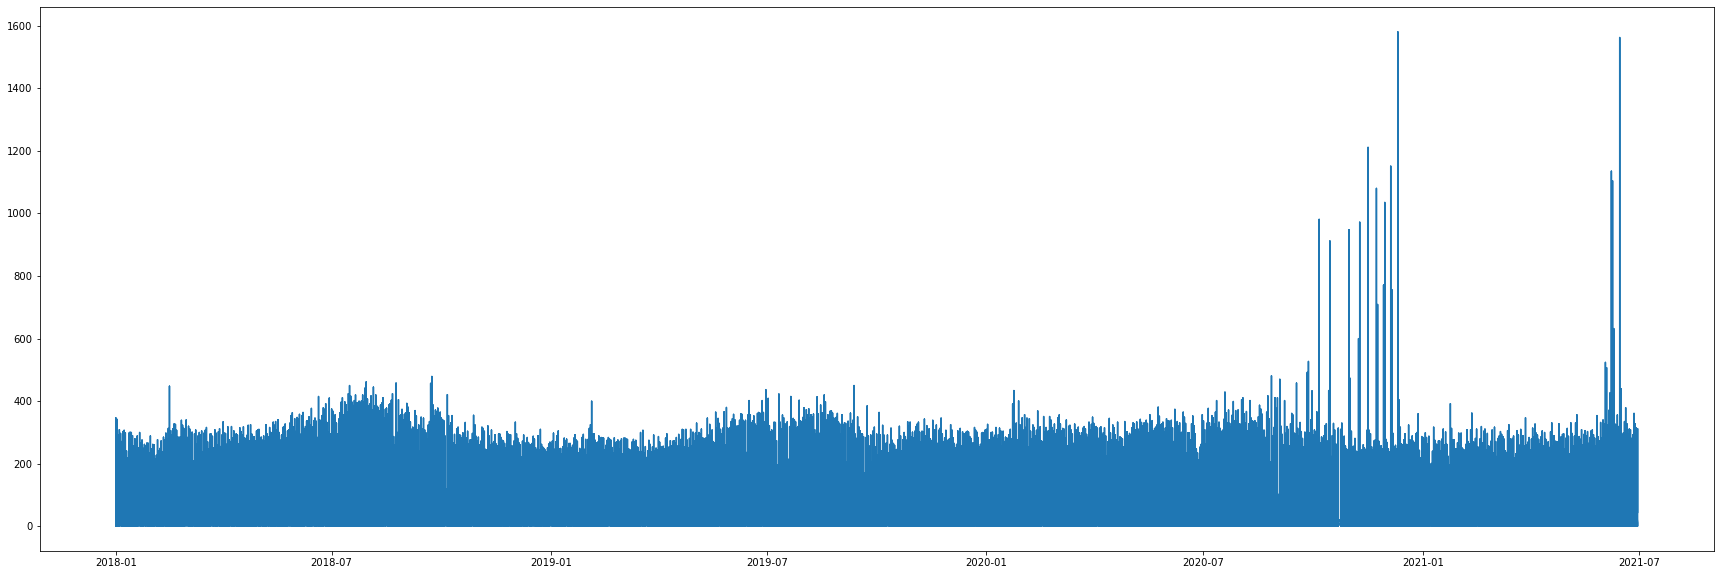

In [19]:
plt.figure(figsize=(30, 10))
plt.plot(df1['base_date'], df1['em_cnt'], "-")

In [42]:
# 알수없음 제외 43개 읍명동
grouped = df1['em_g'].groupby(df1['emd_nm']).sum()
grouped = pd.DataFrame(grouped)
grouped.to_csv("음식물쓰레기_읍면동.csv", encoding='cp949')